In [68]:
import pandas as pd
import numpy as np

In [69]:
# Importing Country Data .csv
country_df = pd.read_csv(r'C:\Users\mahe\Desktop\Upgrad\Machine Learning\PCA and Clustering Assaignment\Country-data.csv')

In [70]:
# Looking at the first few rows
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [71]:
#data quality check and cleaning
country_df.shape

(167, 10)

In [72]:
#Sanity Check
country_df.info()
country_df.describe()
country_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [73]:
#NA Handling
country_df.isnull().values.any()
country_df.isnull().values.sum()
country_df.isnull().sum()*100/country_df.shape[0]


country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [74]:
#Duplicates
country_df[country_df.duplicated(['country'], keep=False)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [75]:
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [76]:
#Splitting Data into Training and Testing Sets
# Putting feature variable to X
X = country_df[['child_mort', 'exports', 'health', 'imports',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

# Putting response variable to y
y = country_df['income']

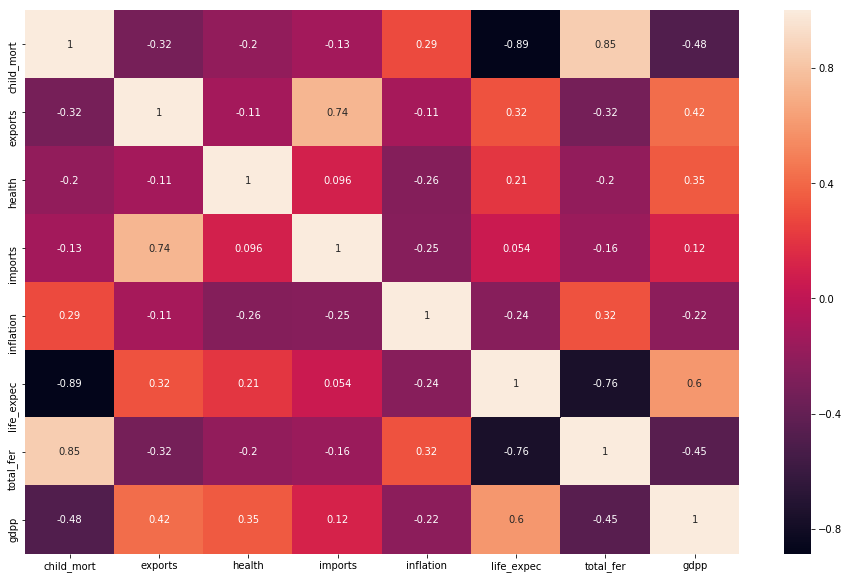

In [77]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [78]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())
p=np.diagflat(corrmat.diagonal())

In [80]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])


max corr: 0.8484781105566703 , min corr:  -0.8866760973367759
ij_max (6, 0)
Maximum correlation : 0.8484781105566703


In [81]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (3, 5)
Minimum correlation : 0.054390534928787385


In [51]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [88]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=100)

In [91]:
#PCA on Trained Data sets
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [92]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

,Feature,PC1,PC2
0,child_mort,0.482740,0.015588
1,exports,-0.239425,0.604259
2,health,-0.227967,-0.352659
3,imports,-0.133718,0.649669
4,inflation,0.240628,-0.047210
5,life_expec,-0.470904,-0.123998
6,total_fer,0.465648,-0.008437
7,gdpp,-0.378561,-0.265545


In [96]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7]
                       ,'Feature':colnames})

In [97]:
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,child_mort,0.482740,0.015588,-0.201610,0.142754,-0.293006,0.044347,0.060845,-0.783691
1,exports,-0.239425,0.604259,0.112494,0.331639,-0.362414,0.408877,0.386290,0.084635
2,health,-0.227967,-0.352659,-0.610305,0.388549,0.362026,0.283646,0.297406,-0.015870
3,imports,-0.133718,0.649669,-0.391593,0.117975,0.334240,-0.415552,-0.306761,-0.119513
4,inflation,0.240628,-0.047210,0.529331,0.704351,0.381058,-0.045645,-0.126651,-0.015474
5,life_expec,-0.470904,-0.123998,0.261726,-0.008018,0.023683,-0.547329,0.513470,-0.361287
6,total_fer,0.465648,-0.008437,-0.244250,0.205935,-0.250437,-0.493262,0.377667,0.482053
7,gdpp,-0.378561,-0.265545,-0.111942,0.407633,-0.575795,-0.180982,-0.492139,0.031409


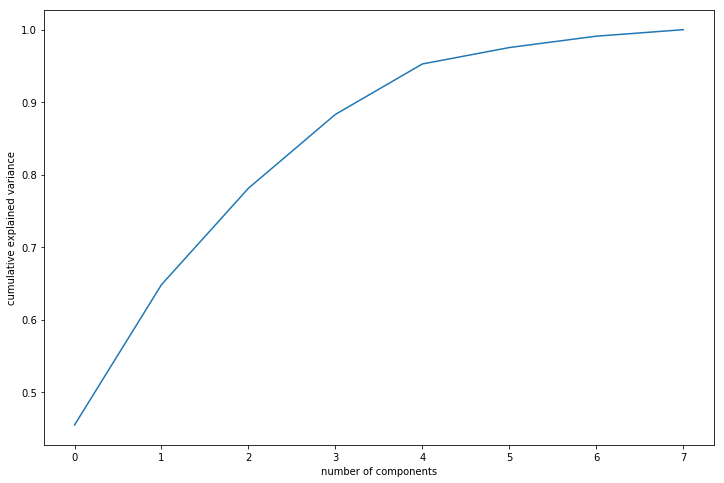

In [98]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [101]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

0.0

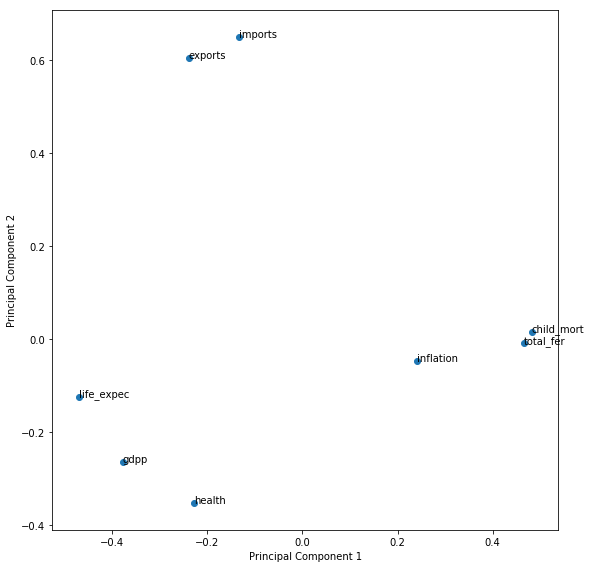

In [102]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

In [103]:
pca_train = pca.transform(Xtrain)
pca_train.shape 

(111, 8)

In [117]:
pca_train

array([[-2.22109171e-01, -1.07371490e-01,  9.63004143e-01,
        -1.12114867e+00,  6.50627766e-01, -3.13751735e-01,
        -5.07486916e-01, -1.97222188e-01],
       [ 2.82337509e+00, -1.30279284e+00, -1.98485004e+00,
         7.78164571e-01,  5.70690829e-01, -1.55770331e-02,
         4.79227057e-01,  3.01942861e-01],
       [ 8.35598465e-01,  4.60796951e-01, -7.65835691e-01,
         3.01345603e-01,  2.60873910e-01,  1.10526806e+00,
        -5.40516171e-01,  2.17084461e-01],
       [-3.37678530e-01,  2.35951782e-01,  8.90908383e-01,
        -6.37947916e-01,  5.26485963e-01, -4.32854166e-01,
        -1.98956043e-01, -9.13882542e-02],
       [-1.52402564e+00,  3.28222841e-01,  3.60187064e-02,
        -7.60059218e-01,  6.09336213e-01, -5.28966125e-01,
         8.35161003e-02, -3.70506138e-01],
       [ 7.82130985e-02, -1.45798124e-01,  1.29097167e+00,
         3.33306792e-02, -3.00022030e-01,  1.21402105e+00,
         3.48049830e-01, -9.99993774e-02],
       [-1.22247388e+00,  6.525843

In [121]:
country_df_pca=country_df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [105]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())

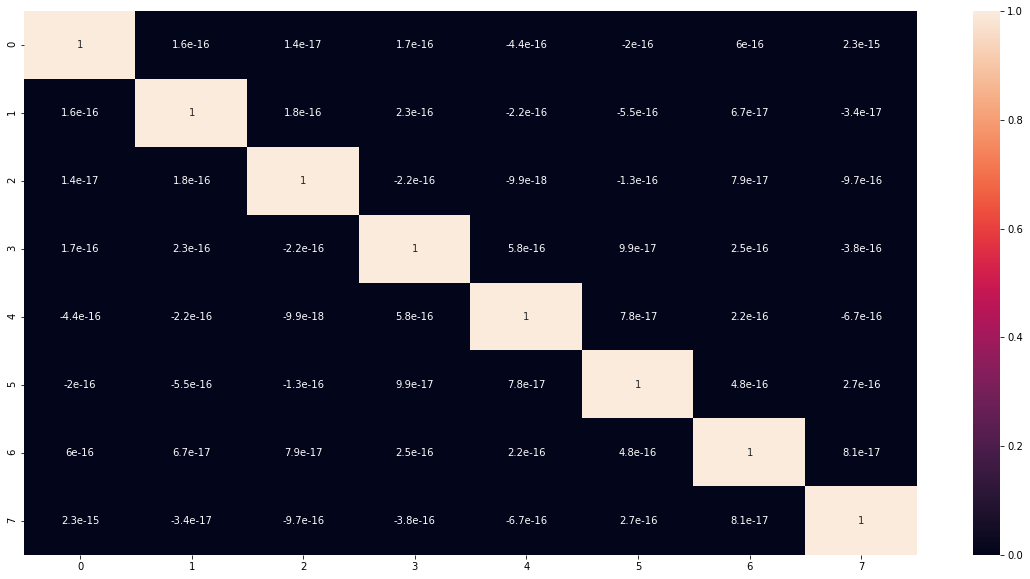

In [106]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [107]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.2680721184811444e-15 , min corr:  -9.687807474400304e-16


In [109]:
#Applying selected components to the test data
pca_test = pca.transform(Xtest)
pca_test.shape

(48, 8)

In [114]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 

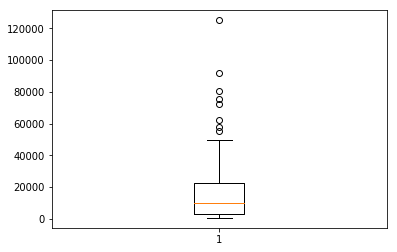

In [115]:
# outlier treatment for Amount
plt.boxplot(country_df.income)
Q1 = country_df.income.quantile(0.25)
Q3 = country_df.income.quantile(0.75)
IQR = Q3 - Q1
country_df = country_df[(country_df.income >= Q1 - 1.5*IQR) & (country_df.income <= Q3 + 1.5*IQR)]

In [122]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(country_df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

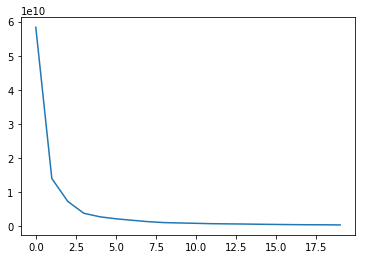

In [129]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

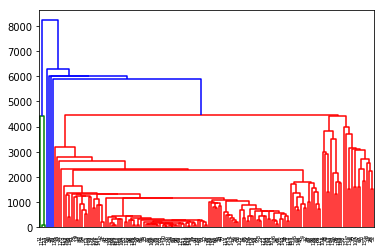

In [126]:
# heirarchical clustering
mergings = linkage(country_df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

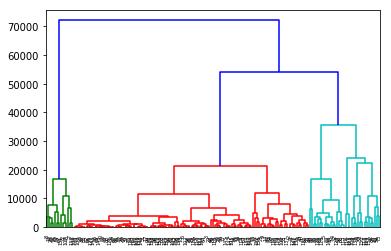

In [128]:
mergings = linkage(country_df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()